In [27]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [28]:
wine = load_wine()
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [29]:
import pandas as pd

pd.DataFrame(wine.data, columns=wine.feature_names).describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.20, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)

clf = clf.fit(X_train, y_train)
rfc = rfc.fit(X_train, y_train)
score_c = clf.score(X_test, y_test)
score_r = rfc.score(X_test, y_test)

print("Single Tree:{}".format(score_c), "\n Random Forest:{}".format(score_r))

Single Tree:0.9444444444444444 
 Random Forest:1.0


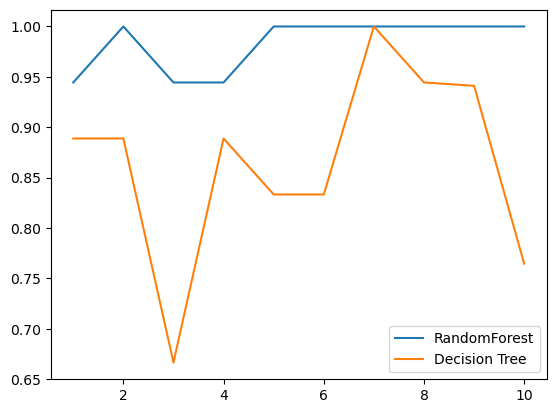

In [31]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10)

clf = DecisionTreeClassifier(random_state=42)
clf_s = cross_val_score(clf, wine.data, wine.target, cv=10)

plt.plot(range(1, 11), rfc_s, label="RandomForest")
plt.plot(range(1, 11), clf_s, label="Decision Tree")
plt.legend()
plt.show()

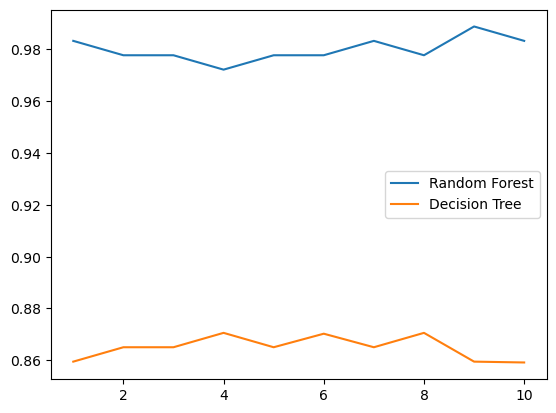

In [32]:
RandomForestScoreList = []
DecisionTreeScoreList = []

for i in range(10):
    rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
    RandomForestScoreList.append(rfc_s)

    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf, wine.data, wine.target, cv=10).mean()
    DecisionTreeScoreList.append(clf_s)

plt.plot(range(1, 11), RandomForestScoreList, label="Random Forest")
plt.plot(range(1, 11), DecisionTreeScoreList, label="Decision Tree")
plt.legend()
plt.show()

In [ ]:
ScoreList = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i + 1, n_jobs=-1, random_state=42)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10, n_jobs=-1).mean()
    ScoreList.append(rfc_s)

0.9888888888888889 93


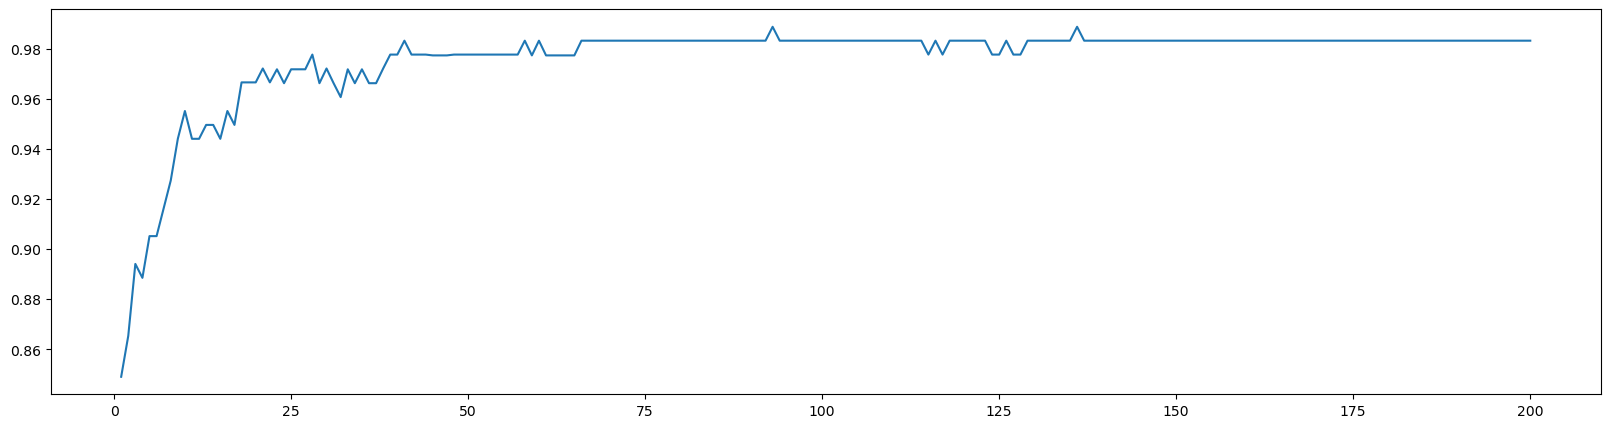

In [34]:
print(max(ScoreList), ScoreList.index(max(ScoreList)) + 1)  #打印出：最高精确度取值，max(superpa))+1指的是森林数目的数量n_estimators
plt.figure(figsize=[20, 5])
plt.plot(range(1, 201), ScoreList)
plt.show()

装袋集成算法是对基评估器的预测结果进行平均或用多数表决原则来决定集成评估器的结果。

在刚才的红酒例子中，我们建立了25棵树，对任何一个样本而言，平均或多数表决原则下，当且仅当有13棵以上的树判断错误的时候，随机森林才会判断错误

单独一棵决策树对红酒数据集的分类准确率在0.85上下浮动，假设一棵树判断错误的可能性为0.2(ε)，那20棵树以上都判断错误的可能性是

In [36]:
import numpy as np
from scipy.special import comb

np.array([comb(25, i) * (0.2 ** i) * ((1 - 0.2) ** (25 - i)) for i in range(13, 26)]).sum()

0.00036904803455582827

In [46]:
#随机森林的重要属性之一：estimators，查看森林中树的状况

rfc = RandomForestClassifier(n_estimators=20)
rfc = rfc.fit(X_train, y_train)

rfc.estimators_[0].random_state

1821225801

In [53]:
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

1821225801
1640112983
1175571970
827041746
20668051
877467098
1772632131
1676343865
171294273
1693653550
535847017
1939831022
151672825
1702003928
1838952547
168512514
1874938746
331022638
19974727
1071471136


当n足够大时，这个概率收敛于1-(1/e)，约等于0.632。因此，会有约37%的训练数据被浪费掉，没有参与建模，这些数据被称为袋外数据(out of bag data，简写为oob)。除了我们最开始就划分好的测试集之外，这些数据也可以被用来作为集成算法的测试集。也就是说，在使用随机森林时，我们可以不划分测试集和训练集，只需要用袋外数据来测试我们的模型即可

In [53]:
# 使用 袋外数据(out of bag data，简写为oob) 评估结果

In [63]:
rfc = RandomForestClassifier(n_estimators=100, oob_score=True)
rfc.fit(wine.data, wine.target)

rfc.oob_score_

0.9831460674157303

In [65]:
rfc = RandomForestClassifier(n_estimators=100)
rfc = rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

rfc.feature_importances_
#结合zip可以对照特征名字查看特征重要性，参见上节决策树
rfc.apply(X_test)  #apply返回每个测试样本所在的叶子节点的索引
rfc.predict(X_test)  #predict返回每个测试样本的分类/回归结果
#rfc.predict_proba(X_test)

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0])

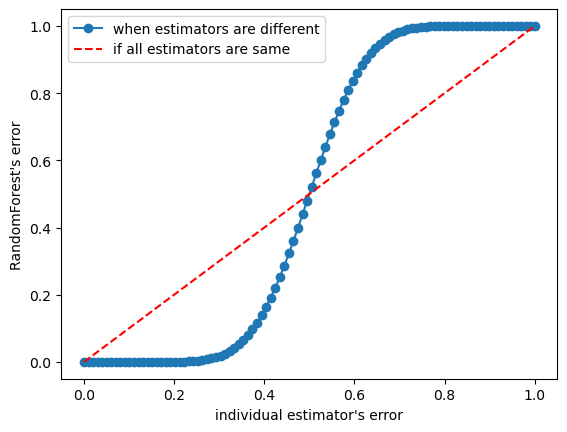

In [66]:
# 为什么要求基分类器的判断准确率至少要超过随机分类器，即时说，基分类器的判断准确率至少要超过50%。

x = np.linspace(0, 1, num=100)
y = []

for epsilon in x:
    E = np.array([comb(25, i) * (epsilon ** i) * ((1 - epsilon) ** (25 - i)) for i in range(13, 26)]).sum()
    y.append(E)

plt.plot(x, y, "o-", label="when estimators are different")
plt.plot(x, x, "--", color="red", label="if all estimators are same")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error")
plt.legend()
plt.show()

In [68]:
from sklearn.datasets import fetch_openml

boston = fetch_openml("Boston-house-price-data", version=1)

D:\anaconda3\envs\sklearn\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

regressor = RandomForestRegressor(n_estimators=100, random_state=42)  #实例化

cross_val_score(regressor, boston.data, boston.target, cv=10, n_jobs=-1,
                scoring="neg_mean_squared_error")


array([-10.18574684,  -5.13848041,  -4.53190112, -22.36051861,
       -11.15626043, -23.39530398,  -6.9214093 , -93.6629826 ,
       -27.78995472, -13.7522049 ])

In [71]:
#sklearn当中的模型评估指标（打分）列表

from sklearn.metrics import SCORERS

sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

使用随机森林填充缺失值


In [76]:
X_full, y_full = boston.data, boston.target
n_samples = X_full.shape[0]  #506
n_features = X_full.shape[1]  #13

In [124]:
#首先确定我们希望放入的缺失数据的比例，在这里我们假设是50%，那总共就要有3289个数据缺失
rng = np.random.RandomState(seed=42)
missing_rate = 0.5

n_missing_samples = int(np.floor(n_samples * n_features * missing_rate))  #3289

#randint（下限，上限，n）指在下限和上限之间取出n个整数
missing_features = rng.randint(0, n_features, size=n_missing_samples) #3289
missing_samples = rng.randint(0, n_samples, size=n_missing_samples)

X_missing = X_full.copy()
y_missing = y_full.copy()

In [125]:
X_missing = np.array(X_missing)

In [126]:
X_missing[missing_samples,missing_features] = np.nan
X_missing = pd.DataFrame(X_missing)
X_missing.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,18.0,NaN,0.0,0.538,NaN,NaN,4.0900,1.0,NaN,15.3,396.90,4.98
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.9,4.9671,NaN,NaN,17.8,396.90,9.14
2,0.02729,0.0,7.07,NaN,NaN,7.185,NaN,NaN,NaN,242.0,17.8,392.83,NaN
3,NaN,0.0,2.18,0.0,0.458,6.998,NaN,NaN,3.0,222.0,18.7,NaN,2.94
4,NaN,NaN,2.18,NaN,0.458,7.147,NaN,6.0622,NaN,222.0,18.7,NaN,5.33


In [127]:
#使用均值进行填补
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')#实例化
X_missing_mean = imp_mean.fit_transform(X_missing)#特殊的接口fit_transform = 训练fit + 导出predict
#pd.DataFrame(X_missing_mean).isnull()#但是数据量大的时候还是看不全
#布尔值False = 0， True = 1
# pd.DataFrame(X_missing_mean).isnull().sum()#如果求和为0可以彻底确认是否有NaN

#使用0进行填补
imp_0 = SimpleImputer(missing_values=np.nan, strategy="constant",fill_value=0)#constant指的是常数
X_missing_0 = imp_0.fit_transform(X_missing)

In [129]:
X_missing_reg = X_missing.copy()

#找出数据集中，缺失值从小到大排列的特征们的顺序，并且有了这些的索引
sortindex = np.argsort(X_missing_reg.isnull().sum(axis=0)).values#np.argsort()返回的是从小到大排序的顺序所对应的索引